# 2-D Poisson's Equation

## Description

Consider the equation
$$- \left( u_{xx} + u_{yy} \right) = f ,\qquad (x,y) \in [a,b]^{2}$$
where the values on the boundaries are given
Applying the Central difference approximation in the $x$ and $y$ directions:
$$- u_{xx}(x,y) = \frac{2u(x,y) - u(x+\triangle x, y) - u(x-\triangle x,y)}{\triangle x^{2}} + \frac{\partial^{4}u(x,y)}{\partial x^{4}} \frac{\triangle x^{2}}{12} + \ldots $$
$$- u_{yy}(x,y) = \frac{2u(x,y) - u(x, y+\triangle y) - u(x,y- \triangle y)}{\triangle y^{2}} + \frac{\partial^{4}u(x,y)}{\partial y^{4}} \frac{\triangle y^{2}}{12} + \ldots$$
We can choose the the partition sizes during discretization along $x$ and $y$ to be the same.
$$\triangle x = \triangle y = h = \frac{b-a}{N-1}$$
where, $N$ is the number of points taken along a single direction
Now consider the equations for $u_{xx}$ and $u_{yy}$,
$$- u_{xx}(x,y) = \frac{2u(x,y) - u(x+h, y) - u(x-h,y)}{h^{2}} + O(h^{2})$$
$$- u_{yy}(x,y) = \frac{2u(x,y) - u(x, y+h) - u(x,y-h)}{h^{2}} + O(h^{2})$$
Adding the two equations we get,
$$- \left( u_{xx} + u_{yy} \right) = \frac{4u(x,y) - u(x+h,y) - u(x-h,y) - u(x,y+h) - u(x,y-h)}{h^{2}} + O(h^{2})$$
Now, we can define the discrete points in the domain to be as,
$$x_{i} = a + ih, \qquad i = 0,\ldots, N-1$$
$$y_{j} = a + jh, \qquad j = 0,\ldots, N-1$$
And thus let $U_{i,j}$ be the approximation to $u(x_{i},y_{j})$.
Rearranging and applying the approximation we get
$$4U_{i,j} - U_{i+1,j} - U_{i-1,j} - U_{i,j+1} - U_{i,j-1} = h^{2} f_{i,j} , \qquad i \in [1,N-2], \qquad j \in [1,N-2]$$
This is a set of $k \times k$ unknowns where
$$k = N-2$$
To solve this system we need to linearly order the unknowns. Let
$$I = I_{ij} = (j-1) + (i-1) \times k$$
This is called lexicographic ordering as it sorts the coordinates $(i,j)$ as if they are strings.
Using this ordering gives $n = k^{2}$ equations
$$4U_{I} - U_{I+1} - U_{I-1} - U_{I+k} - U_{I-k} = h^{2}f_{I}, \qquad I \in [0, k^{2})$$
The matrix that characterizes this set of equations is
$$A= \left(\begin{array} {ccccc|ccccc|cc} 4&-1&&&\emptyset&-1&&&&\emptyset&\\ -1&4&-1&&&&-1&&&&\\ &\ddots&\ddots&\ddots&&&&\ddots&&\\ &&\ddots&\ddots&-1&&&&\ddots&\\ \emptyset&&&-1&4&\emptyset&&&&-1&\\ \hline -1&&&&\emptyset&4&-1&&&&-1\\ &-1      &      &&&-1      &4       &-1      &&&&-1\\ &\uparrow&\ddots&&&\uparrow&\uparrow&\uparrow&&  &&\uparrow\\ &l-k     &      &&&l-1     &l       &l+1     &&-1&&l+k\\ &&&&-1&&&&-1&4&&\\ \hline &        &      &&&\ddots  &        &        &&  &\ddots\\ \end{array} \right)$$

## Solution

### Gauss- Jacobi Method

For solving the equation using the Gauss Jacobi method we define the iterations as follows
$$U_{i,j}^{(m+1)} = \frac{1}{4} \left( h^{2}f_{i,j} + U_{i+1,j}^{(m)} + U_{i-1,j}^{(m)} + U_{i,j+1}^{(m)} + U_{i,j-1}^{(m)} \right), \qquad I \in [0, k^{2}), \qquad m \ge 0$$
where,
$$U_{I}^{(0)} = 0 , \qquad I \in [0, k^{2})$$
In this case we define the residue as
$$\lVert e^{(m)} \rVert = \sqrt{\sum_{i=1}^{N-1} \sum_{j=1}^{N-1} \left( f_{ij} - \left( \frac{4 U_{i,j}^{(m)} - U_{i+1,j}^{(m)} - U_{i-1,j}^{(m)} - U_{i,j+1}^{(m)} - U_{i,j-1}^{(m)}}{h^{2}} \right) \right)^{2}}$$
Since, we have assumed $0$ to be the starting iteration, we can define
$$\lVert e^{(0)} \rVert = \sqrt{\sum_{i=1}^{N-1} \sum_{j=1}^{N-1} \left( f_{i} \right)^{2}}$$
Thus the tolerance or relative residue is 
$$\mu = \frac{\lVert e^{(m)} \rVert}{\lVert e^{(0)} \rVert}$$

### Gauss-Seidel Method

For solving this using the Gauss Seidel method we define the iterations as follows
$$U_{I}^{(m+1)} = \frac{1}{4} \left( h^{2}f_{I} + U_{I+1}^{(m)} + U_{I-1}^{(m+1)} + U_{I+k}^{(m)} + U_{I-k}^{(m+1)} \right), \qquad I \in [0, k^{2}), \qquad m \ge 0$$
where,
$$U_{I}^{(0)} = 0 , \qquad I \in [0, k^{2})$$
In this case we define the residue as
$$\lVert e^{(m)} \rVert = \sqrt{\sum_{i=1}^{N-1} \sum_{j=1}^{N-1} \left( f_{ij} - \left( \frac{4 U_{i,j}^{(m)} - U_{i+1,j}^{(m)} - U_{i-1,j}^{(m)} - U_{i,j+1}^{(m)} - U_{i,j-1}^{(m)}}{h^{2}} \right) \right)^{2}}$$
Since, we have assumed $0$ to be the starting iteration, we can define
$$\lVert e^{(0)} \rVert = \sqrt{\sum_{i=1}^{N-1} \sum_{j=1}^{N-1} \left( f_{i} \right)^{2}}$$
Thus the tolerance or relative residue is 
$$\mu = \frac{\lVert e^{(m)} \rVert}{\lVert e^{(0)} \rVert}$$

## Implementation

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

### Building the Relative Residue

In [2]:
def findRelativeResidue(h, U, f):
    """
    This method takes partition size h, the solution vector U and the function vector f
    """
    mresidue = 0.0
    zeroresidue = 0.0
    for i in range(1,N-1):
        for j in range(1,N-1):
            mresiduehelper = f[i,j] - (4*U[i,j] - U[i+1,j] - U[i-1,j] - U[i,j+1] - U[i,j-1])/h**2
            mresidue += mresiduehelper**2
            zeroresidue += f[i,j]**2
    relativeresidue = np.sqrt(mresidue/zeroresidue)
    return relativeresidue

### Set global variables for the test cases

In [13]:
d = (0,1)
N = 30
h = (d[1] - d[0])/(N-1)
x = np.linspace(d[0],d[1],N)
y = np.linspace(d[0],d[1],N)

mu = 1.0e-6
MAXITER = 10000

### Gauss-Jacobi Method

Number of Jacobi iterations: 2319


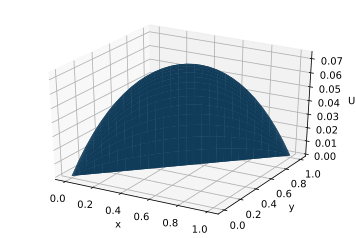

In [14]:
def test_jacobi(f):
    U_prev = np.zeros((N,N))
    U_next = np.zeros((N,N))
    for iteration in range(MAXITER):
        U_prev[:,:] = U_next
        for i in range(1,N-1):
            for j in range(1,N-1):
                U_next[i,j] = 0.25*(h**2*f[i,j] + U_prev[i+1,j] + U_prev[i-1,j] + U_prev[i,j+1] + U_prev[i,j-1])
        diff = findRelativeResidue(h,U_next,f)
        if diff < mu:
            break
    print("Number of Jacobi iterations: " + str(iteration))
    fig = plt.figure()
    ax = fig.add_subplot(111,projection='3d')
    ax.plot_surface(x,y,U_next)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('U')
f = np.ones((N,N))
test_jacobi(f)

### Gauss-Seidel Method

Number of Gauss-Seidel iterations: 1160


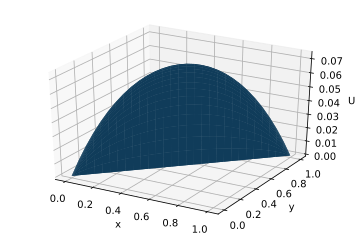

In [16]:
def test_seidel(f):
    U = np.zeros((N,N))
    for iteration in range(MAXITER):
        for i in range(1,N-1):
            for j in range(1,N-1):
                U[i,j] = 0.25*(h**2*f[i,j] + U[i+1,j] + U[i-1,j] + U[i,j+1] + U[i,j-1])
        diff = findRelativeResidue(h,U,f)
        if diff < mu:
            break
    print("Number of Gauss-Seidel iterations: " + str(iteration))
    fig = plt.figure()
    ax = fig.add_subplot(111,projection='3d')
    ax.plot_surface(x,y,U)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('U')
    
test_seidel(f)